Author: Miroshnychenko Oleg Olegovich

Group: K-12

Variant: 89

Lab instructor: Efremov Mykola Serhiiovych

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import math

In [9]:
base= {
    'with_labels': True, 'font_color' : 'white','font_weight':'bold',
    'node_color' : 'black','node_size' : 200, 'width':1.5
}

#1

In [10]:
Graph = nx.Graph()
Graph.add_nodes_from(range(12))
Graph.add_edges_from(
    [(0,1),(0,2),(0,3),(0,4),(1,2),(1,3),(1,4),(2,3),
     (2,4),(3,4),(5,6),(5,7),(5,8),(6,7),(6,8),(8,7)])
fname='Graph.txt'
nx.write_adjlist(Graph,fname)

#2

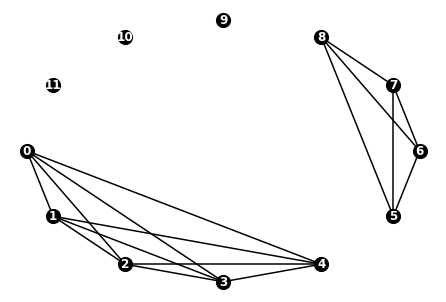

In [11]:
Graph_1 = nx.read_adjlist(fname,nodetype= int)
Graph_1.edges
nx.draw_shell(Graph_1,**base)
plt.savefig("Graph_1.png")

#3

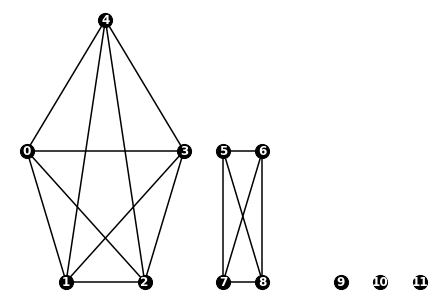

In [12]:
Graph_2= nx.read_adjlist(fname,nodetype= int)
pos = {
    0:(0, 2), 1:(1, 1),2:(3, 1), 3:(4, 2),4:(2, 3), 5:(5, 2),
    6:(6,2),7:(5, 1), 8:(6, 1),9:(8, 1), 10:(9, 1),11:(10, 1)}
nx.draw(Graph_2,pos =pos,**base)
plt.savefig("Graph_2.png")

#4

graph nodes: 5
graph edges: 10
graph diameter: 1
graph radius: 1
graph eccentricity: {0: 1, 1: 1, 2: 1, 3: 1, 4: 1}


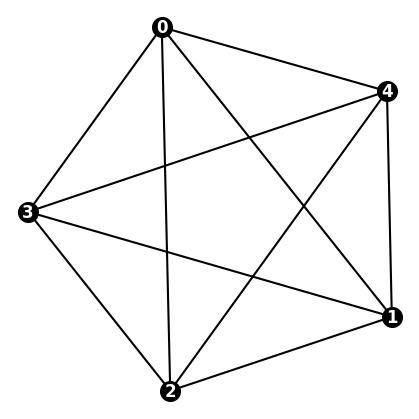

graph nodes: 4
graph edges: 6
graph diameter: 1
graph radius: 1
graph eccentricity: {8: 1, 5: 1, 6: 1, 7: 1}


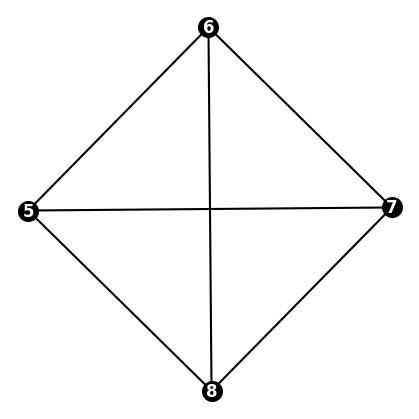

graph nodes: 1
graph edges: 0
graph diameter: 0
graph radius: 0
graph eccentricity: {9: 0}


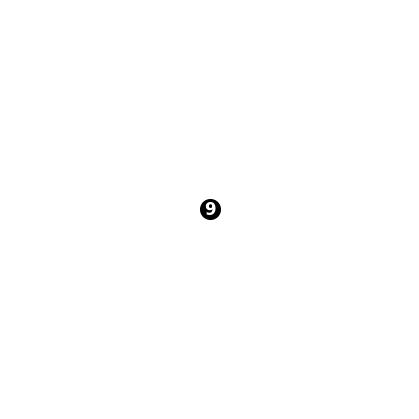

graph nodes: 1
graph edges: 0
graph diameter: 0
graph radius: 0
graph eccentricity: {10: 0}


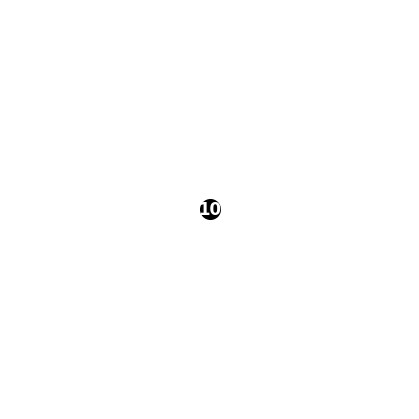

graph nodes: 1
graph edges: 0
graph diameter: 0
graph radius: 0
graph eccentricity: {11: 0}


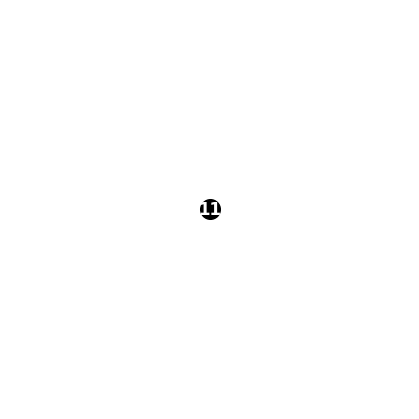

In [13]:
Graph_2 = nx.read_adjlist(fname,nodetype= int)
for component in nx.connected_components(Graph_2):
    sub = Graph_2.subgraph(component)
    subgraph_nodes = nx.number_of_nodes(sub)
    subgraph_edges = nx.number_of_edges(sub)
    subgraph_dim = nx.diameter(sub) 
    subgraph_rad = nx.radius(sub)
    subgraph_ecc =nx.eccentricity(sub)
    plt.figure(figsize=(4, 4), dpi=100)
    nx.draw(
        sub, with_labels = True, font_color = 'White',
        font_weight='bold',node_color = 'black',node_size = 200, width=1.5)
    print("graph nodes:",subgraph_nodes)
    print("graph edges:",subgraph_edges)
    print("graph diameter:",subgraph_dim)
    print("graph radius:",subgraph_rad)
    print("graph eccentricity:",subgraph_ecc)
    for node in component:
        plt.show()

№5

component 1 diameter: 1


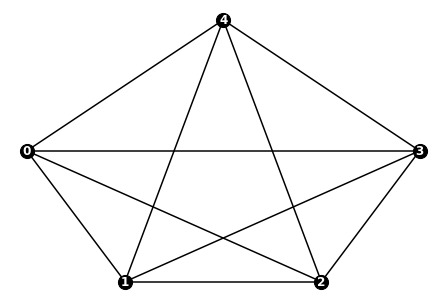

component 2 diameter: 1


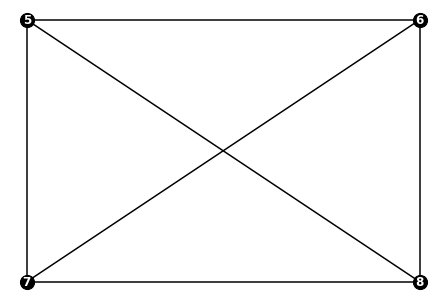

component 3 diameter: 0


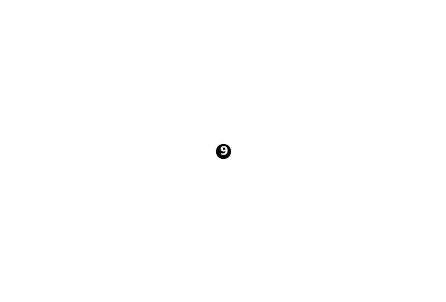

component 4 diameter: 0


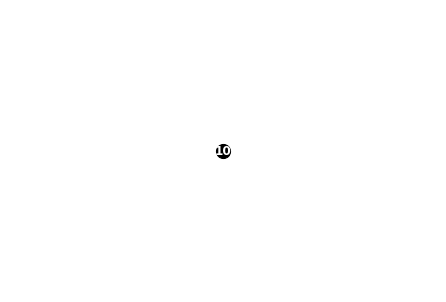

component 5 diameter: 0


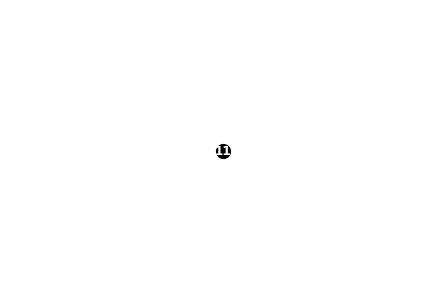

In [14]:
number_of_component = 0
for component in nx.connected_components(Graph_2):
    number_of_component += 1
    sub = Graph_2.subgraph(component)
    component_ecc = nx.eccentricity(sub)
    dim = max(component_ecc.values())
    print("component",number_of_component,"diameter:",dim)
    nx.draw(sub,pos= pos, **base)
    plt.show()

#6

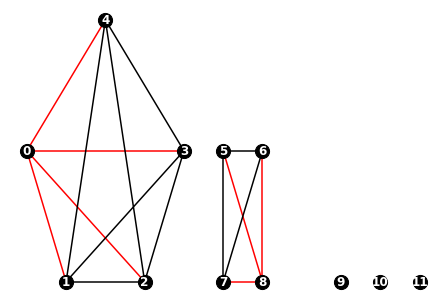

In [15]:
edges = set()
for component in nx.connected_components(Graph_2):
    sub = Graph.subgraph(component)
    first_node = list(sub.nodes)[0]
    tree = nx.bfs_tree(sub, first_node)
    tree_edge = tree.edges()
    edges.update(tree_edge)
    
edge_color = ["red" if (i, j) in edges or (j, i) in edges else "black" for (i, j) in Graph_2.edges]
nx.draw(Graph_2,pos= pos, **base, edge_color = edge_color)
plt.savefig("Tree.png")